<a href="https://colab.research.google.com/github/pks98/Fake_news_predictor/blob/main/Fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import re

In [24]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [25]:
df.shape

(20800, 5)

In [26]:
df.duplicated().sum()

0

In [27]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [30]:
df.fillna("",inplace=True)

In [31]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [59]:
df['txt']=df['title']+" "+df['author']

In [60]:
df.head()

,id,title,author,text,label,txt
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [61]:
df['txt'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus'

In [62]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
port_stem=PorterStemmer()

In [55]:
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [63]:
df['txt'].apply(text_processing)   

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: txt, Length: 20800, dtype: object

In [64]:
df['txt']=df['txt'].apply(text_processing)

In [65]:
df.head()

,id,title,author,text,label,txt
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire consortiumnew com
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi jessi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...


In [66]:
x=df['txt']
y=df['label']

In [72]:
vec=TfidfVectorizer()

x=vec.fit_transform(x)

In [74]:
print(x)

  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (1, 3568)	0.26373768806048464
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.2954204

In [75]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6,stratify=y)

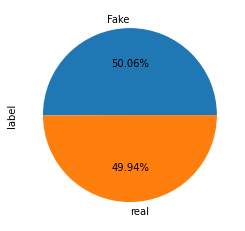

In [80]:
df['label'].value_counts().plot(kind='pie',labels=['Fake','real'],autopct='%.2f%%')

In [81]:
from sklearn.metrics import accuracy_score

In [85]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.99
The accuracy of the test data is :  0.98


In [86]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
train_pred=svc.predict(x_train)
test_pred=svc.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  1.0
The accuracy of the test data is :  0.99


In [87]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  1.0
The accuracy of the test data is :  0.99


In [88]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
train_pred=rf.predict(x_train)
test_pred=rf.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  1.0
The accuracy of the test data is :  0.99


In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gf=GradientBoostingClassifier()
gf.fit(x_train,y_train)
train_pred=gf.predict(x_train)
test_pred=gf.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.97
The accuracy of the test data is :  0.96


In [90]:
from sklearn.ensemble import AdaBoostClassifier

af=AdaBoostClassifier()
af.fit(x_train,y_train)
train_pred=af.predict(x_train)
test_pred=af.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.98
The accuracy of the test data is :  0.98


In [91]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
train_pred=xgb.predict(x_train)
test_pred=xgb.predict(x_test)
print('The accuracy of the train data is : ',np.round(accuracy_score(train_pred,y_train),2))
print('The accuracy of the test data is : ',np.round(accuracy_score(test_pred,y_test),2))

The accuracy of the train data is :  0.96
The accuracy of the test data is :  0.95


In [93]:
import pickle

pickle.dump(vec,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model1.pkl','wb'))

In [105]:
df['txt'][13168]

'pressur deutsch bank report surpris profit rise debt trade revenu way behind barclay co iwb'

In [103]:
df.sample(5)

,id,title,author,text,label,txt
2823,2823,Chris McDaniel Blasts ’Republican Surrender Ca...,Dan Riehl,"Chris McDaniel, Mississippi State Senator, sai...",0,chri mcdaniel blast republican surrend caucu o...
14411,14411,Penn State President Claims MILO Creating ’Ant...,Ben Kew,The President of Pennsylvania State University...,0,penn state presid claim milo creat anti free s...
13168,13168,Under-pressure Deutsche Bank reports surprise ...,IWB,— Holger Zschaepitz (@Schuldensuehner) October...,1,pressur deutsch bank report surpris profit ris...
8570,8570,NOT KIDDING: Colleges Give Students “Safe Spac...,EdJenner,Students expressed their “fear” over a Trump p...,1,kid colleg give student safe space cri trump w...
18040,18040,Report: New York Times Profit PLUMMETS,EdJenner,A new report shows that the New York Times ‘ p...,1,report new york time profit plummet edjenn
